In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
from Function import fillNANValue,loadfilesnew,result,plot_feature_importances,Grid_result,pca
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.ensemble import BalancedBaggingClassifier

C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# loading train & test data (part 1)
first_train_file_path1 = os.path.join("H:\\Project\\AI Projects\\Sepcis detection\\dataset\\training","p000001.psv")
first_train_file_df1 = pd.read_csv(first_train_file_path1,sep='|')
initial_df_train1 = fillNANValue(first_train_file_df1)
path1 = "H:\\Project\\AI Projects\\Sepcis detection\\dataset\\training"
file_in_dir = os.listdir(path1)
first_test_file_path1 = os.path.join("H:\\Project\\AI Projects\\Sepcis detection\\dataset\\training",file_in_dir[-1])
first_test_file_df1 = pd.read_csv(first_test_file_path1,sep='|')
initial_df_test1 = fillNANValue(first_test_file_df1)
file_in_dir = file_in_dir[1:-1]
file_in_dir = random.sample(file_in_dir, len(file_in_dir))
train_files1 = file_in_dir[:int(len(file_in_dir)*0.125)]
test_files1 = file_in_dir[int(len(file_in_dir)*0.125):]

train_data1 = loadfilesnew(path1, train_files1, initial_df_train1)
test_data1 = loadfilesnew(path1, test_files1, initial_df_test1)

print(train_data1.shape,test_data1.shape)

Done 500 Done 1000 Done 1500 Done 2000 Done 2500 Done 500 Done 1000 Done 1500 Done 2000 Done 2500 Done 3000 Done 3500 Done 4000 Done 4500 Done 5000 Done 5500 Done 6000 Done 6500 Done 7000 Done 7500 Done 8000 Done 8500 Done 9000 Done 9500 Done 10000 Done 10500 Done 11000 Done 11500 Done 12000 Done 12500 Done 13000 Done 13500 Done 14000 Done 14500 Done 15000 Done 15500 Done 16000 Done 16500 Done 17000 Done 17500 (99938, 41) (690277, 41)


In [5]:
# saving data to train & test
train_data1.to_csv('Test_data.csv',header = True, index = False, mode = 'w')
test_data1.to_csv('Train_data.csv',header = True, index = False, mode = 'w')

2346 97592 sepsis =  2.347455422361864


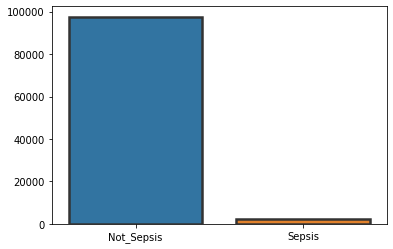

In [16]:
# plot1
count1 = (train_data1["SepsisLabel"] == 1).sum()
count2 = (train_data1["SepsisLabel"] == 0).sum()
count = [count2 ,count1]
class_name = ['Not_Sepsis' , 'Sepsis']
print(count1, count2, 'sepsis = ', (count1/(count1+count2))*100)
sns.barplot(x = class_name , y = count , linewidth = 2.5 , errcolor = '.2' , edgecolor = '.2')


14790 675487 sepsis =  2.142618108382577


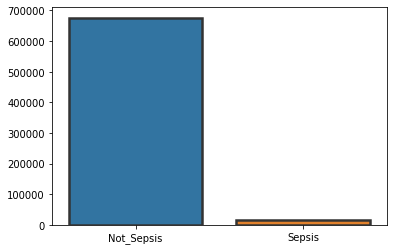

In [17]:
# plot 2
count3 = (test_data1["SepsisLabel"] == 1).sum()
count4 = (test_data1["SepsisLabel"] == 0).sum()
count = [count4, count3]
class_name = ['Not_Sepsis' , 'Sepsis']
print(count3, count4, 'sepsis = ', (count3/(count3+count4))*100)
sns.barplot(x = class_name , y = count , linewidth = 2.5 , errcolor = '.2' , edgecolor = '.2')

In [20]:
# loading train & test data (part 2)
first_train_file_path2 = os.path.join("H:\\Project\\AI Projects\\Sepcis detection\\dataset\\training_setB","p100001.psv")
first_train_file_df2 = pd.read_csv(first_train_file_path2,sep='|')
initial_df_train2 = fillNANValue(first_train_file_df2)
path2 = "H:\\Project\\AI Projects\\Sepcis detection\\dataset\\training_setB"
file_in_dir2 = os.listdir(path2)
first_test_file_path2 = os.path.join("H:\\Project\\AI Projects\\Sepcis detection\\dataset\\training_setB",file_in_dir2[-1])
first_test_file_df2 = pd.read_csv(first_test_file_path2,sep='|')
initial_df_test2 = fillNANValue(first_test_file_df2)
file_in_dir2 = file_in_dir2[1:-1]
file_in_dir2 = random.sample(file_in_dir2, len(file_in_dir2))
train_files2 = file_in_dir2[:int(len(file_in_dir2)*0.875)]
test_files2 = file_in_dir2[int(len(file_in_dir2)*0.875):]

train_data2 = loadfilesnew(path2, train_files2, initial_df_train2)
test_data2 = loadfilesnew(path2, test_files2, initial_df_test2)

print(train_data2.shape,test_data2.shape)

Done 500 Done 1000 Done 1500 Done 2000 Done 2500 Done 3000 Done 3500 Done 4000 Done 4500 Done 5000 Done 5500 Done 6000 Done 6500 Done 7000 Done 7500 Done 8000 Done 8500 Done 9000 Done 9500 Done 10000 Done 10500 Done 11000 Done 11500 Done 12000 Done 12500 Done 13000 Done 13500 Done 14000 Done 14500 Done 15000 Done 15500 Done 16000 Done 16500 Done 17000 Done 500 Done 1000 Done 1500 Done 2000 Done 2500 (666899, 41) (95096, 41)


In [23]:
# save data to  train & test file
test_data2.to_csv('Test_data.csv',header = False, index = False, mode = 'a')
train_data2.to_csv('Train_data.csv',header = False, index = False, mode = 'a')

9487 657412 sepsis =  1.4225542398474131


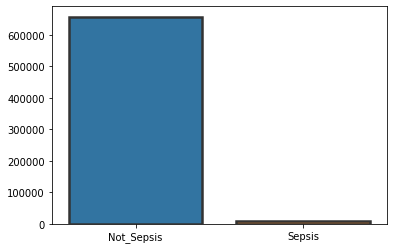

In [22]:
# plot 3
count1 = (train_data2["SepsisLabel"] == 1).sum()
count2 = (train_data2["SepsisLabel"] == 0).sum()
count = [count2 ,count1]
class_name = ['Not_Sepsis' , 'Sepsis']
print(count1, count2, 'sepsis = ', (count1/(count1+count2))*100)
sns.barplot(x = class_name , y = count , linewidth = 2.5 , errcolor = '.2' , edgecolor = '.2')

1293 93803 sepsis =  1.3596786405316732


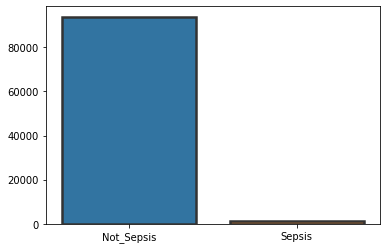

In [21]:
# plot 4
count3 = (test_data2["SepsisLabel"] == 1).sum()
count4 = (test_data2["SepsisLabel"] == 0).sum()
count = [count4, count3]
class_name = ['Not_Sepsis' , 'Sepsis']
print(count3, count4, 'sepsis = ', (count3/(count3+count4))*100)
sns.barplot(x = class_name , y = count , linewidth = 2.5 , errcolor = '.2' , edgecolor = '.2')

# List of different dataset

1. All raw data
2. Raw data with selected feature
3. All data with some feature changed to categorical
4. Categorical data with some selected feature

In [19]:
# load with non-Nan valued data
path = 'H:\\Project\\AI Projects\\Sepsis Detection New' 
train_data = pd.read_csv(os.path.join(path, 'Train_data.csv'))
test_data = pd.read_csv(os.path.join(path, 'Test_data.csv'))
test_data.dropna(inplace = True)
train_data.dropna(inplace = True)
train_X, train_y = train_data.iloc[:,0:-1], train_data.iloc[:,-1]
test_X, test_y = test_data.iloc[:,0:-1], test_data.iloc[:,-1]

24277 1332809 sepsis =  1.7889065247154563  ,  3639 191335 sepsis =  1.866402699847159


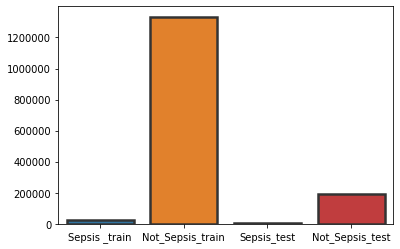

In [6]:
# plot 4
count1 = (train_data["SepsisLabel"] == 1).sum()
count2 = (train_data["SepsisLabel"] == 0).sum()
count3 = (test_data["SepsisLabel"] == 1).sum()
count4 = (test_data["SepsisLabel"] == 0).sum()
count = [count1, count2, count3, count4]
class_name = ['Sepsis _train', 'Not_Sepsis_train', 'Sepsis_test', 'Not_Sepsis_test']
print(count1, count2, 'sepsis = ', (count1/(count1+count2))*100, ' , ', count3, count4, 'sepsis = ', (count3/(count3+count4))*100)
sns.barplot(x = class_name , y = count , linewidth = 2.5 , errcolor = '.2' , edgecolor = '.2')

##                                   simple raw data

In [7]:
# simple all raw data
std = StandardScaler()
train_X_scaled = std.fit_transform(train_X)
test_X_scaled = std.transform(test_X)

In [33]:
test_y.shape

(194973, 41)

                                              Decision Tree

In [37]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier()
clf_DTC = clf_DTC.fit(train_X_scaled,train_y)
result(clf_DTC,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.9573122570188846
# Precision on test set 0.061751497005988025
# Recall on test set 0.09068425391591096
# F1 score on test set 0.07347211399309808

Confusion matrix
 [[186321   5014]
 [  3309    330]]
Accuracy on test set 0.9573122570188846
Precision on test set 0.061751497005988025
Recall on test set 0.09068425391591096
F1 score on test set 0.07347211399309808
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      0.97      0.98    191335
      sepsis       0.06      0.09      0.07      3639

    accuracy                           0.96    194974
   macro avg       0.52      0.53      0.53    194974
weighted avg       0.97      0.96      0.96    194974

Confusion matrix on train set
 [[1332809       0]
 [      2   24275]]
Accuracy on train set 0.9999985262540473
Precision on train set 1.0
Recall on train set 0.9999176174980434
F1 score on train set 0.9999588070522327
Classification report on train

              precision    recall  f1-score   support

  not sepsis       1.00      1.00      1.00   1332809
      sepsis       1.00      1.00      1.00     24277

    accuracy

                                        
                                        
                                        Logistic Regression

In [38]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(train_X_scaled,train_y)
result(lr,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.9813462307794886
# Precision on test set 0.5192307692307693
# Recall on test set 0.00741962077493817
# F1 score on test set 0.014630181522622595

Confusion matrix
 [[191310     25]
 [  3612     27]]
Accuracy on test set 0.9813462307794886
Precision on test set 0.5192307692307693
Recall on test set 0.00741962077493817
F1 score on test set 0.014630181522622595
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      1.00      0.99    191335
      sepsis       0.52      0.01      0.01      3639

    accuracy                           0.98    194974
   macro avg       0.75      0.50      0.50    194974
weighted avg       0.97      0.98      0.97    194974

Confusion matrix on train set
 [[1332546     263]
 [  24189      88]]
Accuracy on train set 0.9819819819819819
Precision on train set 0.25071225071225073
Recall on train set 0.0036248300860897147
F1 score on train set 0.00714633750203021
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.98      1.00      0.99   1332809
      sepsis       0.25      0.00      0.01     

                                                
                                                
                                                
                                                Random Forest

In [6]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier()
clf_RF = clf_RF.fit(train_X_scaled,train_y)
result(clf_RF,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.9812692974447875
# Precision on test set 0.24
# Recall on test set 0.0016488046166529267
# F1 score on test set 0.0032751091703056767

Confusion matrix
 [[191316     19]
 [  3633      6]]
Accuracy on test set 0.9812692974447875
Precision on test set 0.24
Recall on test set 0.0016488046166529267
F1 score on test set 0.0032751091703056767
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      1.00      0.99    191335
      sepsis       0.24      0.00      0.00      3639

    accuracy                           0.98    194974
   macro avg       0.61      0.50      0.50    194974
weighted avg       0.97      0.98      0.97    194974

Confusion matrix on train set
 [[1332809       0]
 [     16   24261]]
Accuracy on train set 0.9999882100323781
Precision on train set 1.0
Recall on train set 0.9993409399843474
F1 score on train set 0.9996703613663521
Classification report on train

              precision    recall  f1-score   support

  not sepsis       1.00      1.00      1.00   1332809
      sepsis       1.00      1.00      1.00     24277

    accuracy            

                                               Naive Bayes

In [5]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB = clf_NB.fit(train_X_scaled,train_y)
result(clf_NB, train_X_scaled, train_y, test_X_scaled, test_y)

# OUTPUT
# Accuracy on test set 0.9008380604593433
# Precision on test set 0.04457083164064767
# Recall on test set 0.2110469909315746
# F1 score on test set 0.07359846669861046


Confusion matrix
 [[174872  16463]
 [  2871    768]]
Accuracy on test set 0.9008380604593433
Precision on test set 0.04457083164064767
Recall on test set 0.2110469909315746
F1 score on test set 0.07359846669861046
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      0.91      0.95    191335
      sepsis       0.04      0.21      0.07      3639

    accuracy                           0.90    194974
   macro avg       0.51      0.56      0.51    194974
weighted avg       0.97      0.90      0.93    194974

Confusion matrix on train set
 [[1216313  116496]
 [  18773    5504]]
Accuracy on train set 0.900323929360409
Precision on train set 0.04511475409836065
Recall on train set 0.22671664538452033
F1 score on train set 0.07525448293306534
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.98      0.91      0.95   1332809
      sepsis       0.05      0.23      0.08     2427

                                               Gradient Boosting 

In [8]:
# gradiient boostng decision tree
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier()
clf_GBC = clf_GBC.fit(train_X_scaled,train_y)
result(clf_GBC, train_X_scaled, train_y, test_X_scaled, test_y)

# OUTPUT
# Accuracy on test set 0.9809872085508837
# Precision on test set 0.211864406779661
# Recall on test set 0.006870019236053861
# F1 score on test set 0.013308490817141336

Confusion matrix
 [[191242     93]
 [  3614     25]]
Accuracy on test set 0.9809872085508837
Precision on test set 0.211864406779661
Recall on test set 0.006870019236053861
F1 score on test set 0.013308490817141336
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      1.00      0.99    191335
      sepsis       0.21      0.01      0.01      3639

    accuracy                           0.98    194974
   macro avg       0.60      0.50      0.50    194974
weighted avg       0.97      0.98      0.97    194974

Confusion matrix on train set
 [[1332652     157]
 [  23930     347]]
Accuracy on train set 0.9822509406183543
Precision on train set 0.6884920634920635
Recall on train set 0.014293364089467396
F1 score on train set 0.028005326661555224
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.98      1.00      0.99   1332809
      sepsis       0.69      0.01      0.03     2

### Conclusion of raw data
on the basis of above training these model are godd for this problem 
1. Decision Tree 2. Random Forest 3. Naive Bayes 
1. Neural Network 2. SVM 

## Raw data with selected feature manually

In [9]:
train_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [15]:
# Raw data with selected feature manually
features = ['HR', 'Temp', 'DBP', 'SBP', 'Resp', 'Platelets', 'Calcium', 'Glucose', 'Age', 'Gender', 'HospAdmTime', 'ICULOS','pH', 'SepsisLabel']
train_data_with_selected_feature_manually = train_data[features]
test_data_with_selected_feature_manually = test_data[features]
train_X = train_data_with_selected_feature_manually.iloc[:,0:-1]
train_y = train_data_with_selected_feature_manually.iloc[:,-1]
test_X = test_data_with_selected_feature_manually.iloc[:,0:-1]
test_y = test_data_with_selected_feature_manually.iloc[:,-1]

# scaling
std = StandardScaler()
train_X_scaled = std.fit_transform(train_X)
test_X_scaled = std.transform(test_X)

###                                                    Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer , f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from Function import Grid_result

params = {'max_depth' : [6,10,25,50] ,
          'min_samples_split' : [5,10,15] ,
          'min_samples_leaf' : [4,8,12], 
          'class_weight' : ['balanced' , {0:1 , 1:9} , {0:1 , 1:10} , {0:5 , 1:5} , {0:1 , 1:90} , {0:1 , 1:99}]
          }
recall = []
precision = []
f1_scores = []
grid_params = []
for max_depth in [6,10,25,50]:
    for min_samples_leaf in [4,8,12]:
        for class_weight in ['balanced' , {0:1 , 1:9} , {0:1 , 1:10} , {0:5 , 1:5} , {0:1 , 1:90} , {0:1 , 1:99}]:
            dtc = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, class_weight = class_weight)
            dtc = dtc.fit(train_X_scaled, train_y)
            pred_test_y = dtc.predict(test_X)
            re = recall_score(test_y,pred_test_y)
            pre = precision_score(test_y,pred_test_y)
            f1 = f1_score(test_y,pred_test_y)
            grid_param = '['+','.join([str(max_depth),str(min_samples_leaf),str(class_weight)])+']'
            grid_params.append(grid_param) 
            print("at {} --> recall : {} , precision : {} , f1-score : {}".format(grid_param,re,pre,f1))
            recall.append(re)
            precision.append(pre)
            f1_scores.append(f1)


at [6,4,balanced] --> recall : 0.5985160758450123 , precision : 0.018001190161332982 , f1-score : 0.034951175871171705
at [6,4,{0: 1, 1: 9}] --> recall : 0.994503984611157 , precision : 0.018657909118092862 , f1-score : 0.03662862781812201
at [6,4,{0: 1, 1: 10}] --> recall : 0.994503984611157 , precision : 0.018657909118092862 , f1-score : 0.03662862781812201
at [6,4,{0: 5, 1: 5}] --> recall : 0.9873591646056609 , precision : 0.01881920365384817 , f1-score : 0.03693443187483617
at [6,4,{0: 1, 1: 90}] --> recall : 0.6166529266281946 , precision : 0.017798082185261854 , f1-score : 0.034597594819611464
at [6,4,{0: 1, 1: 99}] --> recall : 0.6166529266281946 , precision : 0.017798082185261854 , f1-score : 0.034597594819611464
at [6,8,balanced] --> recall : 0.5985160758450123 , precision : 0.018001190161332982 , f1-score : 0.034951175871171705
at [6,8,{0: 1, 1: 9}] --> recall : 0.994503984611157 , precision : 0.018657909118092862 , f1-score : 0.03662862781812201
at [6,8,{0: 1, 1: 10}] --> re

C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [6,12,{0: 5, 1: 5}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [6,12,{0: 1, 1: 90}] --> recall : 0.6166529266281946 , precision : 0.017798082185261854 , f1-score : 0.034597594819611464
at [6,12,{0: 1, 1: 99}] --> recall : 0.6166529266281946 , precision : 0.017798082185261854 , f1-score : 0.034597594819611464


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [10,4,balanced] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [10,4,{0: 1, 1: 9}] --> recall : 0.00741962077493817 , precision : 0.012575687005123428 , f1-score : 0.009332872450743173
at [10,4,{0: 1, 1: 10}] --> recall : 0.00741962077493817 , precision : 0.012575687005123428 , f1-score : 0.009332872450743173
at [10,4,{0: 5, 1: 5}] --> recall : 0.994503984611157 , precision : 0.018666859232590406 , f1-score : 0.03664587468103204
at [10,4,{0: 1, 1: 90}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [10,4,{0: 1, 1: 99}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [10,8,balanced] --> recall : 0.4330860126408354 , precision : 0.02583479501008147 , f1-score : 0.048760867547414995
at [10,8,{0: 1, 1: 9}] --> recall : 0.994503984611157 , precision : 0.018657909118092862 , f1-score : 0.03662862781812201
at [10,8,{0: 1, 1: 10}] --> recall : 0.998076394613905 , precision : 0.018640457799789577 , f1-score : 0.036597408355333434
at [10,8,{0: 5, 1: 5}] --> recall : 0.9

C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [25,4,balanced] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [25,4,{0: 1, 1: 9}] --> recall : 0.003572410002748008 , precision : 0.014192139737991267 , f1-score : 0.0057080131723380905
at [25,4,{0: 1, 1: 10}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [25,4,{0: 5, 1: 5}] --> recall : 0.994503984611157 , precision : 0.018666859232590406 , f1-score : 0.03664587468103204
at [25,4,{0: 1, 1: 90}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [25,4,{0: 1, 1: 99}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [25,8,balanced] --> recall : 0.4330860126408354 , precision : 0.02583479501008147 , f1-score : 0.048760867547414995
at [25,8,{0: 1, 1: 9}] --> recall : 0.994503984611157 , precision : 0.018657909118092862 , f1-score : 0.03662862781812201
at [25,8,{0: 1, 1: 10}] --> recall : 0.998076394613905 , precision : 0.018639405509709734 , f1-score : 0.03659538023627799
at [25,8,{0: 5, 1: 5}] --> recall : 0.9873591646056609 , precision : 0.01881920365384817

C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [50,4,balanced] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [50,4,{0: 1, 1: 9}] --> recall : 0.003572410002748008 , precision : 0.014192139737991267 , f1-score : 0.0057080131723380905
at [50,4,{0: 1, 1: 10}] --> recall : 0.004396812311074471 , precision : 0.015209125475285171 , f1-score : 0.006821573225325091
at [50,4,{0: 5, 1: 5}] --> recall : 0.994503984611157 , precision : 0.018666859232590406 , f1-score : 0.03664587468103204
at [50,4,{0: 1, 1: 90}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [50,4,{0: 1, 1: 99}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [50,8,balanced] --> recall : 0.4330860126408354 , precision : 0.02583479501008147 , f1-score : 0.048760867547414995
at [50,8,{0: 1, 1: 9}] --> recall : 0.994503984611157 , precision : 0.018657909118092862 , f1-score : 0.03662862781812201
at [50,8,{0: 1, 1: 10}] --> recall : 0.998076394613905 , precision : 0.018640457799789577 , f1-score : 0.036597408355333434
at [50,8,{0: 5, 1: 5}] --> recall : 

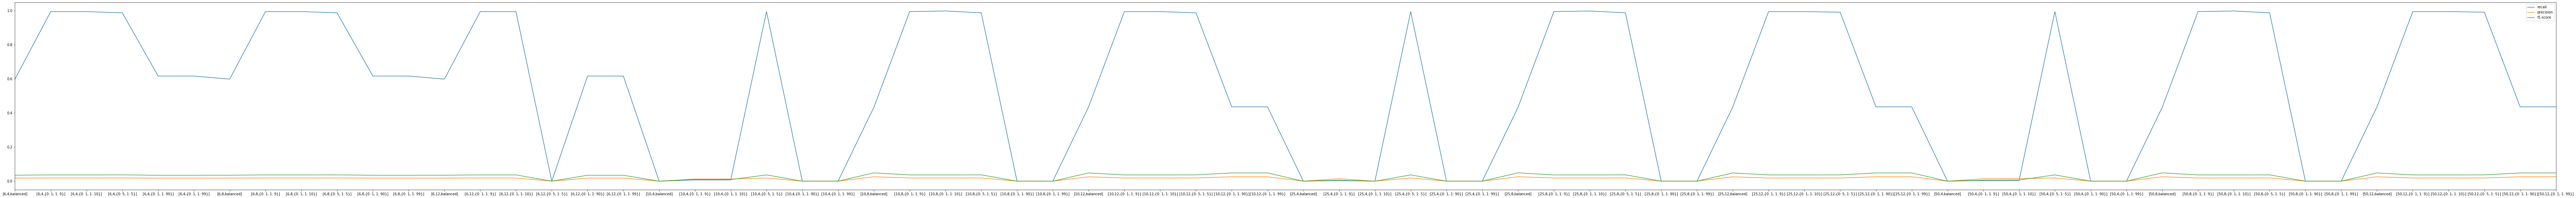

In [20]:
plt.figure(figsize= (40,10))
params = len(grid_params)
plt.plot(range(params),recall , label = 'recall')
plt.plot(range(params),precision , label = 'precision')
plt.plot(range(params),f1_scores , label = 'f1-score')
plt.xticks(np.arange(params), grid_params) 
plt.gca().margins(x = 0)
plt.gcf().canvas.draw()
t1 = plt.gca().get_xticklabels()
maxszie = max([t.get_window_extent().width for t in t1])
m = 0.2
s = maxszie/plt.gcf().dpi*params+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left = margin, right = 1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.legend()
plt.show()

# OUTPUT 
# best paramenter on Recall = (10,8,{0:1,1:9})
# best parameter on Precision =  (10,8,balanced)
# best parameter on F1_Score = (10,8,balanced)
# best parameters on average of all or overall good model = (10,8,balanced)

In [6]:
# decision tree classifier on best hyperparameter
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 8, class_weight = 'balanced')
clf_DTC = clf_DTC.fit(train_X_scaled,train_y)
result(clf_DTC,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.7753187604501113
# Precision on test set 0.044435875334573334
# Recall on test set 0.5383347073371806
# F1 score on test set 0.08209533787323206

Confusion matrix
 [[149208  42127]
 [  1680   1959]]
Accuracy on test set 0.7753187604501113
Precision on test set 0.044435875334573334
Recall on test set 0.5383347073371806
F1 score on test set 0.08209533787323206
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.99      0.78      0.87    191335
      sepsis       0.04      0.54      0.08      3639

    accuracy                           0.78    194974
   macro avg       0.52      0.66      0.48    194974
weighted avg       0.97      0.78      0.86    194974

Confusion matrix on train set
 [[1053478  279331]
 [   7411   16866]]
Accuracy on train set 0.7887075690118386
Precision on train set 0.05694183263166069
Recall on train set 0.6947316389998764
F1 score on train set 0.1052565886780207
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.79      0.88   1332809
      sepsis       0.06      0.69      0.11     2427

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer , f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from Function import Grid_result

recall = []
precision = []
f1_scores = []
grid_params = []

for n_estimators in [100,200,300]:
    for max_depth in [6,10,25,50]:
        for min_samples_leaf in [4,8,12]:
            for class_weight in ['balanced' , {0:1 , 1:9} , {0:1 , 1:10} , {0:5 , 1:5} , {0:1 , 1:90} , {0:1 , 1:99}, None]:
                rf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf, class_weight = class_weight)
                rf = rf.fit(train_X_scaled, train_y)
                pred_test_y = rf.predict(test_X)
                re = recall_score(test_y,pred_test_y)
                pre = precision_score(test_y,pred_test_y)
                f1 = f1_score(test_y,pred_test_y)
                grid_param = '[' + ','.join([str(n_estimators), str(max_depth), str(min_samples_leaf), str(class_weight)]) + ']'
                grid_params.append(grid_param) 
                print("at {} --> recall : {} , precision : {} , f1-score : {}".format(grid_param,re,pre,f1))
                recall.append(re)
                precision.append(pre)
                f1_scores.append(f1)

plt.figure(figsize= (40,10))
params = len(grid_params)
plt.plot(range(params),recall , label = 'recall')
plt.plot(range(params),precision , label = 'precision')
plt.plot(range(params),f1_scores , label = 'f1-score')
plt.xticks(np.arange(params), grid_params) 
plt.gca().margins(x = 0)
plt.gcf().canvas.draw()
t1 = plt.gca().get_xticklabels()
maxszie = max([t.get_window_extent().width for t in t1])
m = 0.2
s = maxszie/plt.gcf().dpi*params+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left = margin, right = 1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.legend()
plt.show()

# OUTPUT 
# best paramenter on Recall = [100,6,4,{0: 1, 1: 9}]
# best parameter on Precision =  [100,10,8,balanced]
# best parameter on F1_Score = [100,25,4,{0: 1, 1: 10}]
# best parameters on average of all or overall good model = [100,25,4,{0: 1, 1: 10}]

at [100,6,4,balanced] --> recall : 1.0 , precision : 0.01866651619919158 , f1-score : 0.03664892465267112
at [100,6,4,{0: 1, 1: 9}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008
at [100,6,4,{0: 1, 1: 10}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,6,4,{0: 5, 1: 5}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,6,4,{0: 1, 1: 90}] --> recall : 0.5905468535311899 , precision : 0.01821093842685965 , f1-score : 0.03533231945414937
at [100,6,4,{0: 1, 1: 99}] --> recall : 0.592470458917285 , precision : 0.01818764657252282 , f1-score : 0.03529190299637423


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,6,4,None] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,6,8,balanced] --> recall : 0.5987908766144545 , precision : 0.01784763574113966 , f1-score : 0.034662127767879865
at [100,6,8,{0: 1, 1: 9}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008
at [100,6,8,{0: 1, 1: 10}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,6,8,{0: 5, 1: 5}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,6,8,{0: 1, 1: 90}] --> recall : 0.6089585050838142 , precision : 0.01795204147764096 , f1-score : 0.03487594331085388
at [100,6,8,{0: 1, 1: 99}] --> recall : 0.6331409727947238 , precision : 0.01753865125944872 , f1-score : 0.03413181636371716


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,6,8,None] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,6,12,balanced] --> recall : 1.0 , precision : 0.01866402699847159 , f1-score : 0.036644127020889865
at [100,6,12,{0: 1, 1: 9}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008
at [100,6,12,{0: 1, 1: 10}] --> recall : 1.0 , precision : 0.018665080040828258 , f1-score : 0.03664615663487779


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,6,12,{0: 5, 1: 5}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,6,12,{0: 1, 1: 90}] --> recall : 0.6342401758724925 , precision : 0.017515899397416632 , f1-score : 0.03409032162770947
at [100,6,12,{0: 1, 1: 99}] --> recall : 1.0 , precision : 0.01866402699847159 , f1-score : 0.036644127020889865


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,6,12,None] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,10,4,balanced] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,10,4,{0: 1, 1: 9}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,10,4,{0: 1, 1: 10}] --> recall : 0.4179719703215169 , precision : 0.025655730791937253 , f1-score : 0.04834403407284979
at [100,10,4,{0: 5, 1: 5}] --> recall : 0.9563066776586975 , precision : 0.01918158567774936 , f1-score : 0.03760881429567228


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,10,4,{0: 1, 1: 90}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,10,4,{0: 1, 1: 99}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,10,4,None] --> recall : 0.003022808463863699 , precision : 0.009649122807017544 , f1-score : 0.004603473530027202
at [100,10,8,balanced] --> recall : 0.048639736191261336 , precision : 0.029613518487535552 , f1-score : 0.03681364392678869
at [100,10,8,{0: 1, 1: 9}] --> recall : 0.9931299807639461 , precision : 0.01881997604540957 , f1-score : 0.03693993427676331
at [100,10,8,{0: 1, 1: 10}] --> recall : 0.9873591646056609 , precision : 0.018810139570921505 , f1-score : 0.03691697533559719
at [100,10,8,{0: 5, 1: 5}] --> recall : 0.9076669414674361 , precision : 0.018956285187927205 , f1-score : 0.037136978446385804


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,10,8,{0: 1, 1: 90}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,10,8,{0: 1, 1: 99}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,10,8,None] --> recall : 0.9400934322616104 , precision : 0.019321679704046767 , f1-score : 0.03786512003718995
at [100,10,12,balanced] --> recall : 0.5812036273701566 , precision : 0.018372452613839713 , f1-score : 0.03561895298803439
at [100,10,12,{0: 1, 1: 9}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008
at [100,10,12,{0: 1, 1: 10}] --> recall : 0.989282769991756 , precision : 0.018837614530080007 , f1-score : 0.036971234325737116


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,10,12,{0: 5, 1: 5}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,10,12,{0: 1, 1: 90}] --> recall : 0.5831272327562517 , precision : 0.01829894017919509 , f1-score : 0.03548435644888882
at [100,10,12,{0: 1, 1: 99}] --> recall : 0.523220665017862 , precision : 0.019984465856372147 , f1-score : 0.03849847846086965


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,10,12,None] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,25,4,balanced] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,25,4,{0: 1, 1: 9}] --> recall : 0.07364660621049739 , precision : 0.022460610124036204 , f1-score : 0.03442296576970008
at [100,25,4,{0: 1, 1: 10}] --> recall : 0.41220115416323166 , precision : 0.02605161693702456 , f1-score : 0.04900599506672983
at [100,25,4,{0: 5, 1: 5}] --> recall : 0.9873591646056609 , precision : 0.018815261675097665 , f1-score : 0.036926840047070676


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,25,4,{0: 1, 1: 90}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,25,4,{0: 1, 1: 99}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,25,4,None] --> recall : 0.9332234130255564 , precision : 0.019428251056940335 , f1-score : 0.03806406778901118
at [100,25,8,balanced] --> recall : 0.5413575158010443 , precision : 0.01886087947227834 , f1-score : 0.03645178003108578
at [100,25,8,{0: 1, 1: 9}] --> recall : 0.9846111569112393 , precision : 0.018849561246606764 , f1-score : 0.03699096132106152
at [100,25,8,{0: 1, 1: 10}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008
at [100,25,8,{0: 5, 1: 5}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,25,8,{0: 1, 1: 90}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,25,8,{0: 1, 1: 99}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,25,8,None] --> recall : 0.029953283869194835 , precision : 0.023400601116358954 , f1-score : 0.026274557068820058
at [100,25,12,balanced] --> recall : 0.9755427315196482 , precision : 0.018860506630397823 , f1-score : 0.03700557168396199
at [100,25,12,{0: 1, 1: 9}] --> recall : 0.9931299807639461 , precision : 0.018813216102114016 , f1-score : 0.036926912505492036
at [100,25,12,{0: 1, 1: 10}] --> recall : 0.9939543830722726 , precision : 0.018824423349154802 , f1-score : 0.0369490711655251


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,25,12,{0: 5, 1: 5}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,25,12,{0: 1, 1: 90}] --> recall : 0.42978840340752955 , precision : 0.025370664763326087 , f1-score : 0.047912996859921876
at [100,25,12,{0: 1, 1: 99}] --> recall : 0.5831272327562517 , precision : 0.018301623169406447 , f1-score : 0.03548940084458753


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,25,12,None] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,50,4,balanced] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,50,4,{0: 1, 1: 9}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,50,4,{0: 1, 1: 10}] --> recall : 0.0464413300357241 , precision : 0.024009092200596677 , f1-score : 0.03165386776549916
at [100,50,4,{0: 5, 1: 5}] --> recall : 0.9873591646056609 , precision : 0.01881210928091982 , f1-score : 0.036920768831595875


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,50,4,{0: 1, 1: 90}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,50,4,{0: 1, 1: 99}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,50,4,None] --> recall : 0.9692223138224787 , precision : 0.019097588841420165 , f1-score : 0.037457121313494976


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,50,8,balanced] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,50,8,{0: 1, 1: 9}] --> recall : 0.9846111569112393 , precision : 0.01886603692119757 , f1-score : 0.03702268582381417
at [100,50,8,{0: 1, 1: 10}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008
at [100,50,8,{0: 5, 1: 5}] --> recall : 0.005221214619400934 , precision : 0.021158129175946547 , f1-score : 0.008375578576151642


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,50,8,{0: 1, 1: 90}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,50,8,{0: 1, 1: 99}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,50,8,None] --> recall : 0.396812311074471 , precision : 0.025639659795095793 , f1-score : 0.04816705026852129
at [100,50,12,balanced] --> recall : 0.5465787304204451 , precision : 0.01860913335142165 , f1-score : 0.03599283400589928
at [100,50,12,{0: 1, 1: 9}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008
at [100,50,12,{0: 1, 1: 10}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,50,12,{0: 5, 1: 5}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [100,50,12,{0: 1, 1: 90}] --> recall : 0.5342126957955482 , precision : 0.018818791686430917 , f1-score : 0.03635683560875257
at [100,50,12,{0: 1, 1: 99}] --> recall : 0.38307227260236326 , precision : 0.025670773253779717 , f1-score : 0.048117082599841224


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [100,50,12,None] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [200,6,4,balanced] --> recall : 0.6114317120087936 , precision : 0.017944706110071616 , f1-score : 0.03486613753711872
at [200,6,4,{0: 1, 1: 9}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008
at [200,6,4,{0: 1, 1: 10}] --> recall : 0.9873591646056609 , precision : 0.018810041096248984 , f1-score : 0.03691678568126008


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [200,6,4,{0: 5, 1: 5}] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0
at [200,6,4,{0: 1, 1: 90}] --> recall : 0.6117065127782357 , precision : 0.017871766462739053 , f1-score : 0.034728885352554355
at [200,6,4,{0: 1, 1: 99}] --> recall : 0.5619675735092058 , precision : 0.018641920163356092 , f1-score : 0.03608674936914363


C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


at [200,6,4,None] --> recall : 0.0 , precision : 0.0 , f1-score : 0.0


In [ ]:
# random Forest on best parameter
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 4, class_weight = {0: 1, 1: 10})
clf_RF = clf_RF.fit(train_X_scaled,train_y)
result(clf_RF,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.9812692974447875
# Precision on test set 0.24
# Recall on test set 0.0016488046166529267
# F1 score on test set 0.0032751091703056767

### Naive Bayes

In [5]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB = clf_NB.fit(train_X_scaled,train_y)
result(clf_NB, train_X_scaled, train_y, test_X_scaled, test_y)

# OUTPUT
# Accuracy on test set 0.9266363720290911
# Precision on test set 0.06762344928241304
# Recall on test set 0.2291838417147568
# F1 score on test set 0.10443275732531931

Confusion matrix
 [[179836  11499]
 [  2805    834]]
Accuracy on test set 0.9266363720290911
Precision on test set 0.06762344928241304
Recall on test set 0.2291838417147568
F1 score on test set 0.10443275732531931
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      0.94      0.96    191335
      sepsis       0.07      0.23      0.10      3639

    accuracy                           0.93    194974
   macro avg       0.53      0.58      0.53    194974
weighted avg       0.97      0.93      0.95    194974

Confusion matrix on train set
 [[1254890   77919]
 [  18851    5426]]
Accuracy on train set 0.9286928020773922
Precision on train set 0.06510288559601655
Recall on train set 0.22350372780821354
F1 score on train set 0.10083440188808979
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.94      0.96   1332809
      sepsis       0.07      0.22      0.10     242

## data distribution of this data

shape before and after PCA
 (1357086, 13) (1357086, 2)


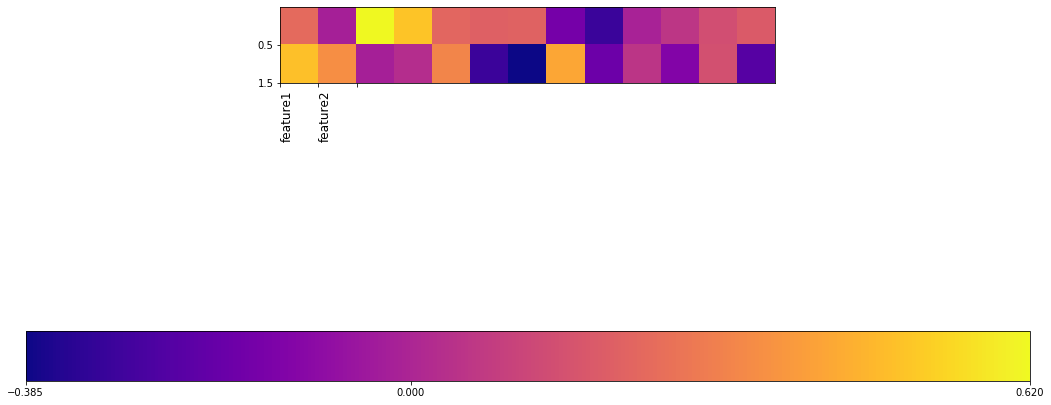

In [16]:
train_pca_X, test_pca_X = pca(train_X_scaled, train_y, test_X_scaled, 2, ['feature1', 'feature2'])

Text(0.5, 1.0, 'train data distribution')

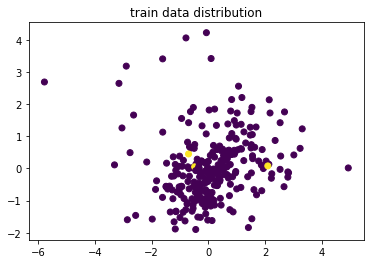

In [19]:
plt.scatter(train_pca_X[0::5000,0],train_pca_X[0::5000,1], c = train_y[0::5000])
plt.title('train data distribution')

Text(0.5, 1.0, 'test data distribution')

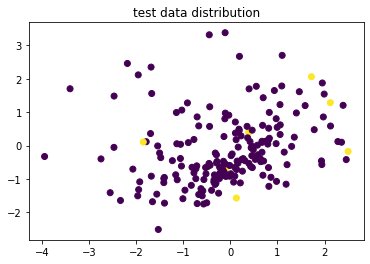

In [20]:
plt.scatter(test_pca_X[0::1000,0],test_pca_X[0::1000,1], c = test_y[0::1000])
plt.title('test data distribution')

## Data with categorical version

In [20]:
# Data with categorical version
# changing data to categorical

# HR = (normal(60-90), down, high)
# DBP = (normal(70-80), lower, higher)
# SBP = (normal(100-120), lower, higher)
# Age = (children(< = 14), teenage(15-21),adult(21-45), old(>45))
# Temp = (normal(35-38), lower, higher)
# Resp = (normal(14-18), lower, higher)
# pH = (normal(7.35 - 7.45), lower, higher)
# Platelets = (normal(240 - 300), lower, higher)
bin_age = [0,14,21,45,120]
label_age = ['children', 'teen', 'adult', 'old']
bin_HR = [0,60,90,200]
label_HR = ['down', 'normal', 'higher']
bin_SBP = [0,100,121,300]
label_SBP = ['down', 'normal', 'higher']
bin_DBP = [0,70,81,300]
label_DBP = ['down', 'normal', 'higher']
bin_Temp = [0,35,39,70]
label_Temp = ['down', 'normal', 'higher']
bin_Resp = [0,14,19,40]
label_Resp = ['down', 'normal', 'higher']
bin_pH = [0,7.35,7.46,10]
label_pH = ['down', 'normal', 'higher']
bin_Platelets = [0,240,301,1000]
label_Platelets = ['down', 'normal', 'higher']
train_data['Age'] = pd.cut(train_data['Age'], bins = bin_age, labels = label_age, right = False)
test_data['Age'] = pd.cut(test_data['Age'], bins = bin_age, labels = label_age, right = False)
train_data['HR'] = pd.cut(train_data['HR'], bins = bin_HR, labels = label_HR, right = False)
test_data['HR'] = pd.cut(test_data['HR'], bins = bin_HR, labels = label_HR, right = False)
train_data['SBP'] = pd.cut(train_data['SBP'], bins = bin_SBP, labels = label_SBP, right = False)
test_data['SBP'] = pd.cut(test_data['SBP'], bins = bin_SBP, labels = label_SBP, right = False)
train_data['DBP'] = pd.cut(train_data['DBP'], bins = bin_DBP, labels = label_DBP, right = False)
test_data['DBP'] = pd.cut(test_data['DBP'], bins = bin_DBP, labels = label_DBP, right = False)
train_data['Temp'] = pd.cut(train_data['Temp'], bins = bin_Temp, labels = label_Temp, right = False)
test_data['Temp'] = pd.cut(test_data['Temp'], bins = bin_Temp, labels = label_Temp, right = False)
train_data['Resp'] = pd.cut(train_data['Resp'], bins = bin_Resp, labels = label_Resp, right = False)
test_data['Resp'] = pd.cut(test_data['Resp'], bins = bin_Resp, labels = label_Resp, right = False)
train_data['pH'] = pd.cut(train_data['pH'], bins = bin_pH, labels = label_pH, right = False)
test_data['pH'] = pd.cut(test_data['pH'], bins = bin_pH, labels = label_pH, right = False)
train_data['Platelets'] = pd.cut(train_data['Platelets'], bins = bin_Platelets, labels = label_Platelets, right = False)
test_data['Platelets'] = pd.cut(test_data['Platelets'], bins = bin_Platelets, labels = label_Platelets, right = False)

In [21]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)
col_seq = [i for i in train_data.columns if i != 'SepsisLabel']
col_seq.append('SepsisLabel')
train_data = train_data.reindex(columns = col_seq)
test_data = test_data.reindex(columns = col_seq)

#### on all data

In [22]:
# scaling
train_X, train_y = train_data.iloc[:,0:-1], train_data.iloc[:,-1]
test_X, test_y = test_data.iloc[:,0:-1], test_data.iloc[:,-1]
std = StandardScaler()
train_X_scaled = std.fit_transform(train_X)
test_X_scaled = std.transform(test_X)

                                                            Decision Tree

In [28]:
# decision tree classifier on best hyperparameter
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 8, class_weight = 'balanced')
clf_DTC = clf_DTC.fit(train_X_scaled,train_y)
result(clf_DTC,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.7696000492373342
# Precision on test set 0.04613118142439367
# Recall on test set 0.57653201428964
# F1 score on test set 0.0854269310639684

Confusion matrix
 [[147954  43381]
 [  1541   2098]]
Accuracy on test set 0.7696000492373342
Precision on test set 0.04613118142439367
Recall on test set 0.57653201428964
F1 score on test set 0.0854269310639684
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.99      0.77      0.87    191335
      sepsis       0.05      0.58      0.09      3639

    accuracy                           0.77    194974
   macro avg       0.52      0.67      0.48    194974
weighted avg       0.97      0.77      0.85    194974

Confusion matrix on train set
 [[1041891  290918]
 [   7220   17057]]
Accuracy on train set 0.7803101645732106
Precision on train set 0.05538436561409205
Recall on train set 0.7025991679367303
F1 score on train set 0.10267507795287914
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.78      0.87   1332809
      sepsis       0.06      0.70      0.10     24277



                                                            Random Forest

In [30]:
# random Forest on best parameter
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 4, class_weight = {0: 1, 1: 10})
clf_RF = clf_RF.fit(train_X_scaled,train_y)
result(clf_RF,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.9707037861458451
# Precision on test set 0.10574362875618105
# Recall on test set 0.07639461390491893
# F1 score on test set 0.0887045309508615

Confusion matrix
 [[188984   2351]
 [  3361    278]]
Accuracy on test set 0.9707037861458451
Precision on test set 0.10574362875618105
Recall on test set 0.07639461390491893
F1 score on test set 0.0887045309508615
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      0.99      0.99    191335
      sepsis       0.11      0.08      0.09      3639

    accuracy                           0.97    194974
   macro avg       0.54      0.53      0.54    194974
weighted avg       0.97      0.97      0.97    194974

Confusion matrix on train set
 [[1325506    7303]
 [  12873   11404]]
Accuracy on train set 0.9851328508289084
Precision on train set 0.6096113754209654
Recall on train set 0.46974502615644437
F1 score on train set 0.5306160431788572
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.99      0.99   1332809
      sepsis       0.61      0.47      0.53     24277

                                                            Naive Bayes

In [31]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB = clf_NB.fit(train_X_scaled,train_y)
result(clf_NB, train_X_scaled, train_y, test_X_scaled, test_y)

# OUTPUT
# Accuracy on test set 0.8977607270713018
# Precision on test set 0.042506597787635464
# Recall on test set 0.2080241824677109
# F1 score on test set 0.0705893323386796

Confusion matrix
 [[174283  17052]
 [  2882    757]]
Accuracy on test set 0.8977607270713018
Precision on test set 0.042506597787635464
Recall on test set 0.2080241824677109
F1 score on test set 0.0705893323386796
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      0.91      0.95    191335
      sepsis       0.04      0.21      0.07      3639

    accuracy                           0.90    194974
   macro avg       0.51      0.56      0.51    194974
weighted avg       0.97      0.90      0.93    194974

Confusion matrix on train set
 [[1212751  120058]
 [  18925    5352]]
Accuracy on train set 0.8975871831261983
Precision on train set 0.04267602264572203
Recall on train set 0.2204555752358199
F1 score on train set 0.0715092158971721
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.98      0.91      0.95   1332809
      sepsis       0.04      0.22      0.07     24277

### categorical data with seleted feature

In [4]:
# categorical data with selected feature manually
features = ['HR', 'Temp', 'DBP', 'SBP', 'Resp', 'Platelets', 'Calcium', 'Glucose', 'Age', 'Gender', 'HospAdmTime', 'ICULOS','pH', 'SepsisLabel']
train_data = train_data[features]
test_data = test_data[features]

train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)
col_seq = [i for i in train_data.columns if i != 'SepsisLabel']
col_seq.append('SepsisLabel')
train_data = train_data.reindex(columns = col_seq)
test_data = test_data.reindex(columns = col_seq)

train_X = train_data.iloc[:,0:-1]
train_y = train_data.iloc[:,-1]
test_X = test_data.iloc[:,0:-1]
test_y = test_data.iloc[:,-1]
print(train_X.shape,test_X.shape)
# scaling
std = StandardScaler()
train_X_scaled = std.fit_transform(train_X)
test_X_scaled = std.transform(test_X)

(1357086, 30) (194974, 30)


                                                        Decision Tree

In [5]:
# decision tree classifier on best hyperparameter
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 8, class_weight = 'balanced')
clf_DTC = clf_DTC.fit(train_X_scaled,train_y)
result(clf_DTC,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.7755803337880949
# Precision on test set 0.04588983722351769
# Recall on test set 0.557021159659247
# F1 score on test set 0.08479397615561599

Confusion matrix
 [[149191  42144]
 [  1612   2027]]
Accuracy on test set 0.7755803337880949
Precision on test set 0.04588983722351769
Recall on test set 0.557021159659247
F1 score on test set 0.08479397615561599
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.99      0.78      0.87    191335
      sepsis       0.05      0.56      0.08      3639

    accuracy                           0.78    194974
   macro avg       0.52      0.67      0.48    194974
weighted avg       0.97      0.78      0.86    194974

Confusion matrix on train set
 [[1043743  289066]
 [   7985   16292]]
Accuracy on train set 0.7811111454985167
Precision on train set 0.05335376836369114
Recall on train set 0.6710878609383367
F1 score on train set 0.09884872662186964
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.78      0.88   1332809
      sepsis       0.05      0.67      0.10     24277

                                                        Random Forest

In [6]:
# random Forest on best parameter
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 4, class_weight = {0: 1, 1: 10})
clf_RF = clf_RF.fit(train_X_scaled,train_y)
result(clf_RF,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.9656826038343574
# Precision on test set 0.11696787148594377
# Recall on test set 0.12805715856004396
# F1 score on test set 0.12226157680703134

Confusion matrix
 [[187817   3518]
 [  3173    466]]
Accuracy on test set 0.9656826038343574
Precision on test set 0.11696787148594377
Recall on test set 0.12805715856004396
F1 score on test set 0.12226157680703134
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      0.98      0.98    191335
      sepsis       0.12      0.13      0.12      3639

    accuracy                           0.97    194974
   macro avg       0.55      0.55      0.55    194974
weighted avg       0.97      0.97      0.97    194974

Confusion matrix on train set
 [[1319788   13021]
 [  14419    9858]]
Accuracy on train set 0.9797802055286106
Precision on train set 0.4308754753267188
Recall on train set 0.40606335214400463
F1 score on train set 0.4181016201543812
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.99      0.99   1332809
      sepsis       0.43      0.41      0.42     2427

In [7]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB = clf_NB.fit(train_X_scaled,train_y)
result(clf_NB, train_X_scaled, train_y, test_X_scaled, test_y)

# OUTPUT
# Accuracy on test set 0.9267389498086924
# Precision on test set 0.058628410315946594
# Recall on test set 0.19428414399560318
# F1 score on test set 0.09007516881131353

Confusion matrix
 [[179983  11352]
 [  2932    707]]
Accuracy on test set 0.9267389498086924
Precision on test set 0.058628410315946594
Recall on test set 0.19428414399560318
F1 score on test set 0.09007516881131353
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      0.94      0.96    191335
      sepsis       0.06      0.19      0.09      3639

    accuracy                           0.93    194974
   macro avg       0.52      0.57      0.53    194974
weighted avg       0.97      0.93      0.95    194974

Confusion matrix on train set
 [[1254981   77828]
 [  19711    4566]]
Accuracy on train set 0.9281261467585694
Precision on train set 0.0554166565526616
Recall on train set 0.18807925196688224
F1 score on train set 0.08560902213347583
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.98      0.94      0.96   1332809
      sepsis       0.06      0.19      0.09     24

## Using Data balancing Technique

### On Raw Data

#### Balance Bagging Classifier

In [8]:
# decision tree classifier on best hyperparameter
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 8, class_weight = 'balanced')
bb_clf = BalancedBaggingClassifier(base_estimator = clf_DTC  , sampling_strategy = 'auto' ,replacement = False ,random_state = 0).fit(train_X_scaled,train_y)
result(bb_clf,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.8029532142747238
# Precision on test set 0.05453660535888109
# Recall on test set 0.5850508381423468
# F1 score on test set 0.09977271129648291

Confusion matrix
 [[154426  36909]
 [  1510   2129]]
Accuracy on test set 0.8029532142747238
Precision on test set 0.05453660535888109
Recall on test set 0.5850508381423468
F1 score on test set 0.09977271129648291
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.99      0.81      0.89    191335
      sepsis       0.05      0.59      0.10      3639

    accuracy                           0.80    194974
   macro avg       0.52      0.70      0.49    194974
weighted avg       0.97      0.80      0.87    194974

Confusion matrix on train set
 [[1082560  250249]
 [   6833   17444]]
Accuracy on train set 0.810563221490753
Precision on train set 0.06516419928799035
Recall on train set 0.7185401820653293
F1 score on train set 0.11949172860225366
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.81      0.89   1332809
      sepsis       0.07      0.72      0.12     24277

In [12]:
# Random Forest classifier on best hyperparameter
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 4, class_weight = {0: 1, 1: 10})
bb_clf = BalancedBaggingClassifier(base_estimator = clf_RF  , sampling_strategy = 'auto' ,replacement = False ,random_state = 0).fit(train_X_scaled,train_y)
result(bb_clf,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.41542974960764
# Precision on test set 0.027646731452545058
# Recall on test set 0.8873316845287167
# F1 score on test set 0.05362273112244051

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-c92515146fe8>", line 4, in <module>
    bb_clf = BalancedBaggingClassifier(base_estimator = clf_RF  , sampling_strategy = 'auto' ,replacement = False ,random_state = 0).fit(train_X_scaled,train_y)
  File "C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\imblearn\ensemble\_bagging.py", line 263, in fit
    return self._fit(X, y, self.max_samples, sample_weight=None)
  File "C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\sklearn\ensemble\_bagging.py", line 380, in _fit
    for i in range(n_jobs))
  File "C:\Users\SURAJ KUMAR\AppData\Local\conda\conda\envs\PythonCPU\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
 

KeyboardInterrupt: 

In [13]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
bb_clf = BalancedBaggingClassifier(base_estimator = clf_NB  , sampling_strategy = 'auto' ,replacement = False ,random_state = 0).fit(train_X_scaled,train_y)
result(bb_clf,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.7755803337880949
# Precision on test set 0.04588983722351769
# Recall on test set 0.557021159659247
# F1 score on test set 0.08479397615561599

Confusion matrix
 [[169982  21353]
 [  2627   1012]]
Accuracy on test set 0.8770092422579421
Precision on test set 0.0452492734182875
Recall on test set 0.2780983786754603
F1 score on test set 0.077834179357022
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.98      0.89      0.93    191335
      sepsis       0.05      0.28      0.08      3639

    accuracy                           0.88    194974
   macro avg       0.52      0.58      0.51    194974
weighted avg       0.97      0.88      0.92    194974

Confusion matrix on train set
 [[1182439  150370]
 [  17417    6860]]
Accuracy on train set 0.8763622939150504
Precision on train set 0.0436303504420276
Recall on train set 0.28257198171108455
F1 score on train set 0.07558937120882389
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.89      0.93   1332809
      sepsis       0.04      0.28      0.08     24277



### on selected feature data

#### Balance Bagging Classifier

In [16]:
# decision tree classifier on best hyperparameter
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 8, class_weight = 'balanced')
bb_clf = BalancedBaggingClassifier(base_estimator = clf_DTC  , sampling_strategy = 'auto' ,replacement = False ,random_state = 0).fit(train_X_scaled,train_y)
result(bb_clf,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.8076717921363874
# Precision on test set 0.05310949213388238
# Recall on test set 0.5528991481176148
# F1 score on test set 0.09691014618404258

Confusion matrix
 [[155463  35872]
 [  1627   2012]]
Accuracy on test set 0.8076717921363874
Precision on test set 0.05310949213388238
Recall on test set 0.5528991481176148
F1 score on test set 0.09691014618404258
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.99      0.81      0.89    191335
      sepsis       0.05      0.55      0.10      3639

    accuracy                           0.81    194974
   macro avg       0.52      0.68      0.49    194974
weighted avg       0.97      0.81      0.88    194974

Confusion matrix on train set
 [[1092230  240579]
 [   7440   16837]]
Accuracy on train set 0.8172415012755271
Precision on train set 0.06540774466233645
Recall on train set 0.693537092721506
F1 score on train set 0.11954148665391047
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.82      0.90   1332809
      sepsis       0.07      0.69      0.12     24277

In [17]:
# Random Forest classifier on best hyperparameter
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 4, class_weight = {0: 1, 1: 10})
bb_clf = BalancedBaggingClassifier(base_estimator = clf_RF  , sampling_strategy = 'auto' ,replacement = False ,random_state = 0).fit(train_X_scaled,train_y)
result(bb_clf,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.5178844358735011
# Precision on test set 0.03100638397259563
# Recall on test set 0.8208298983237153
# F1 score on test set 0.05975553643947427

Confusion matrix
 [[97987 93348]
 [  652  2987]]
Accuracy on test set 0.5178844358735011
Precision on test set 0.03100638397259563
Recall on test set 0.8208298983237153
F1 score on test set 0.05975553643947427
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.99      0.51      0.68    191335
      sepsis       0.03      0.82      0.06      3639

    accuracy                           0.52    194974
   macro avg       0.51      0.67      0.37    194974
weighted avg       0.98      0.52      0.66    194974

Confusion matrix on train set
 [[695635 637174]
 [    44  24233]]
Accuracy on train set 0.530451275748184
Precision on train set 0.036638559918476823
Recall on train set 0.9981875849569551
F1 score on train set 0.07068270515281093
Classification report on train

              precision    recall  f1-score   support

  not sepsis       1.00      0.52      0.69   1332809
      sepsis       0.04      1.00      0.07     24277

    a

In [18]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
bb_clf = BalancedBaggingClassifier(base_estimator = clf_NB  , sampling_strategy = 'auto' ,replacement = False ,random_state = 0).fit(train_X_scaled,train_y)
result(bb_clf,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.853559961841066
# Precision on test set 0.050160702033151566
# Recall on test set 0.3816982687551525
# F1 score on test set 0.08866900734120652

Confusion matrix
 [[165033  26302]
 [  2250   1389]]
Accuracy on test set 0.853559961841066
Precision on test set 0.050160702033151566
Recall on test set 0.3816982687551525
F1 score on test set 0.08866900734120652
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.99      0.86      0.92    191335
      sepsis       0.05      0.38      0.09      3639

    accuracy                           0.85    194974
   macro avg       0.52      0.62      0.50    194974
weighted avg       0.97      0.85      0.90    194974

Confusion matrix on train set
 [[1153136  179673]
 [  14136   10141]]
Accuracy on train set 0.8571873853241431
Precision on train set 0.05342598543837652
Recall on train set 0.41772047617086133
F1 score on train set 0.0947354162482309
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.87      0.92   1332809
      sepsis       0.05      0.42      0.09     2427

### All data with some feature changed to categorical

#### Balance Bagging Classifier

In [23]:
# decision tree classifier on best hyperparameter
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 8, class_weight = 'balanced')
bb_clf = BalancedBaggingClassifier(base_estimator = clf_DTC  , sampling_strategy = 'auto' ,replacement = False ,random_state = 0).fit(train_X_scaled,train_y)
result(bb_clf,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.7932750007693333
# Precision on test set 0.052612313624051346
# Recall on test set 0.592470458917285
# F1 score on test set 0.09664261060558518

Confusion matrix
 [[152512  38823]
 [  1483   2156]]
Accuracy on test set 0.7932750007693333
Precision on test set 0.052612313624051346
Recall on test set 0.592470458917285
F1 score on test set 0.09664261060558518
Classification report on test

              precision    recall  f1-score   support

  not sepsis       0.99      0.80      0.88    191335
      sepsis       0.05      0.59      0.10      3639

    accuracy                           0.79    194974
   macro avg       0.52      0.69      0.49    194974
weighted avg       0.97      0.79      0.87    194974

Confusion matrix on train set
 [[1068700  264109]
 [   7057   17220]]
Accuracy on train set 0.8001851024916623
Precision on train set 0.061209473605636104
Recall on train set 0.7093133418461919
F1 score on train set 0.11269412249759493
Classification report on train

              precision    recall  f1-score   support

  not sepsis       0.99      0.80      0.89   1332809
      sepsis       0.06      0.71      0.11     242

In [24]:
# Random Forest classifier on best hyperparameter
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 4, class_weight = {0: 1, 1: 10})
bb_clf = BalancedBaggingClassifier(base_estimator = clf_RF  , sampling_strategy = 'auto' ,replacement = False ,random_state = 0).fit(train_X_scaled,train_y)
result(bb_clf,train_X_scaled,train_y,test_X_scaled,test_y)

# OUTPUT
# Accuracy on test set 0.1931898612122642
# Precision on test set 0.02179595698068114
# Recall on test set 0.9623522945864248
# F1 score on test set 0.04262648270657472

Confusion matrix
 [[ 34165 157170]
 [   137   3502]]
Accuracy on test set 0.1931898612122642
Precision on test set 0.02179595698068114
Recall on test set 0.9623522945864248
F1 score on test set 0.04262648270657472
Classification report on test

              precision    recall  f1-score   support

  not sepsis       1.00      0.18      0.30    191335
      sepsis       0.02      0.96      0.04      3639

    accuracy                           0.19    194974
   macro avg       0.51      0.57      0.17    194974
weighted avg       0.98      0.19      0.30    194974

Confusion matrix on train set
 [[ 241674 1091135]
 [     12   24265]]
Accuracy on train set 0.19596326246089046
Precision on train set 0.021754527523758293
Recall on train set 0.9995057049882605
F1 score on train set 0.04258224040671173
Classification report on train

              precision    recall  f1-score   support

  not sepsis       1.00      0.18      0.31   1332809
      sepsis       0.02      1.00      0.04     24